Pour voir le notebook en version interactive : https://mybinder.org/v2/gh/fortierq/ML/HEAD?filepath=regression_lineaire.ipynb

# Régression linéaire

Une **regression linéaire** consiste à modéliser une variable à expliquer $Y$ par une somme linéaire de variables explicatives $X_0, ..., X_p$.  
Dans cet exemple, nous utiliserons $Y$ telle que $\mathbb{E}[Y] = \sin$ et des variables explicatives polynomiales $X_k = x \mapsto x^k$, ce qui revient à chercher à approcher $Y$ par:
$$\hat{Y}(x) = X(x) {\alpha} = \alpha_0 + \alpha_1 x^1 + \alpha_2 x^2 + ... + \alpha_p x^p$$
où $X(x) = \begin{bmatrix}
           1 & x^{1} &  x^2 & \cdots & x^{p}
         \end{bmatrix}$
et ${\alpha} = \begin{bmatrix}
           \alpha_{0} \\
           \alpha_{1} \\
           \vdots \\
           \alpha_{p}
         \end{bmatrix}$

$\hat{Y}(x)$ va être la **prédiction** de notre modèle pour une valeur $x$.

# Méthode des moindres carrés

Etant donné des échantillons $(x_i, y_i)$, notons $X$ la matrice des variables explicatives :
$$X = \begin{bmatrix} X(x_0) \\ X(x_1) \\ \vdots \\ X(x_n) \end{bmatrix} = \begin{bmatrix} 1 & x_0^{1} & x_0^2 & \cdots & x_0^{p} \\ \vdots & \vdots & \vdots & \cdots & \vdots \\ 1 & x_n^{1} & x_n^2 & \cdots & x_n^{p} \end{bmatrix}$$
Le vecteur des prédictions devient : 
$$\hat{Y} = \begin{bmatrix} \hat{Y}(x_0) \\ \hat{Y}(x_1) \\ \vdots \\ \hat{Y}(x_n) \end{bmatrix} = X \alpha$$


# Équation normale

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
n = 10  # nombre de tirages (taille de l'univers)
X = np.linspace(0, 4, n)
Y = np.random.normal(np.sin(X), 0.5, size = (1, n))
p = n // 2  # degré du polynôme utilisé pour la régression

In [3]:
def normale_eq(Y, M, p):
    return np.linalg.inv(M @ M.T + 0.01*np.eye(p)) @ M @ Y.T

def f(W, X):
    return np.sum(W[i]*X**i for i in range(len(W)))

M = [np.array([X**k for k in range(p)]) for p in range(1, n+1)]
W = [normale_eq(Y, M[p], p+1) for p in range(n)]
X_plot = np.linspace(0, 4, 100)
sinX = np.sin(X_plot)
Y_plot = [f(W[p], X_plot) for p in range(n)]
erreur_test = [np.sum((Y_plot[p] - sinX)**2) for p in range(n)]
erreur_train = [np.sum((f(W[p], X) - Y)**2) for p in range(n)]

fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
ax1.scatter(X, Y, label="Données")
ax1.plot(X_plot, sinX, linestyle='dotted', color="red", label="sin")
plot_pred, = ax1.plot(X_plot, Y_plot[p], label="Prédiction")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(n), erreur_test, label = "Erreur entre sin et prédiction")
plot_err_test = ax2.scatter([p], [erreur_test[p]], s = 100)
ax2.plot(np.arange(n), erreur_train, label = "Erreur entre données et prédiction")
ax2.set_xlabel("p")
ax2.legend()
plot_err_train = ax2.scatter([p], [erreur_train[p]], s = 100)
plt.tight_layout()

@interact(p = (0, n-1))
def regression(p = n//2):  
    plot_pred.set_ydata(Y_plot[p])
    plot_err_test.set_offsets([[p, erreur_test[p]]])
    plot_err_train.set_offsets([p, erreur_train[p]])
    plt.draw()

<ipython-input-3-54afe7d8e893>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(W[i]*X**i for i in range(len(W)))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=5, description='p', max=9), Output()), _dom_classes=('widget-interact',)…

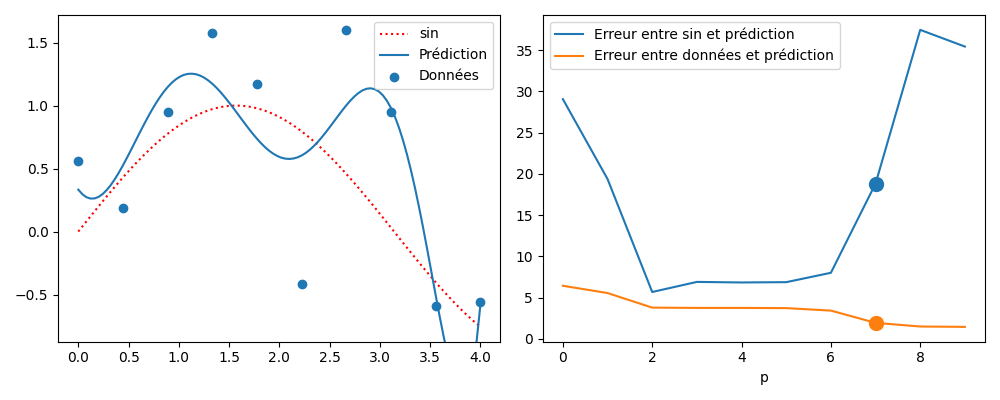